     Tipo_Test Traffico                   RTT
0         echo        0   0.01970815658569336
1         echo        0   0.01018214225769043
2         echo        0   0.01935863494873047
3         echo        0  0.019961833953857422
4         echo        0   0.01995992660522461
...        ...      ...                   ...
4650       UDP      20M  0.010894536972045898
4651       UDP      20M  0.019245147705078125
4652       UDP      20M   0.02015399932861328
4653       UDP      20M  0.019229888916015625
4654       UDP      20M  0.019943714141845703

[4655 rows x 3 columns]


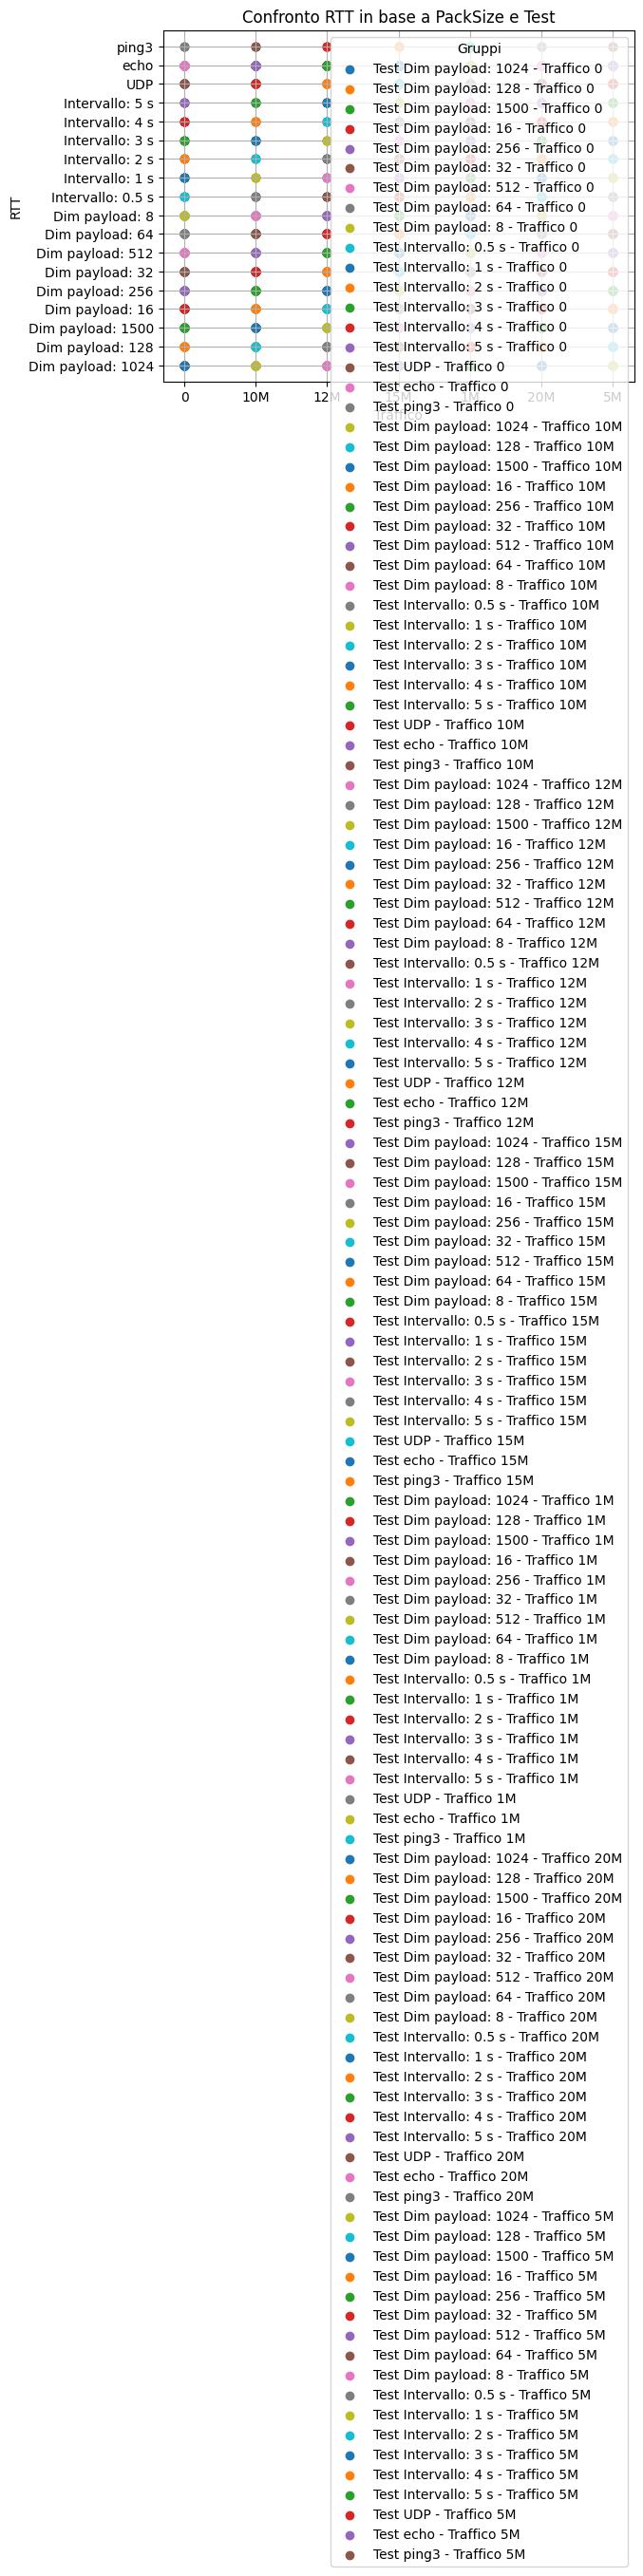

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-08-09.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Creare il grafico a dispersione
#plt.figure(figsize=(12, 8))

# Raggruppare i dati per 'Test' e 'PackSize'
groups = df.groupby(['Traffico', 'Tipo_Test'])

# Disegnare i punti per ciascun gruppo
for (Traffico, Tipo_Test), group in groups:
    plt.scatter(group['Traffico'], group['Tipo_Test'], label=f'Test {Tipo_Test} - Traffico {Traffico}')

# Etichette degli assi
plt.xlabel('Traffico')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Gruppi')
plt.grid(True)
plt.show()


     Tipo_Test Traffico       RTT
0         echo        0  0.019708
1         echo        0  0.010182
2         echo        0  0.019359
3         echo        0  0.019962
4         echo        0  0.019960
...        ...      ...       ...
4645       UDP      20M  0.010895
4646       UDP      20M  0.019245
4647       UDP      20M  0.020154
4648       UDP      20M  0.019230
4649       UDP      20M  0.019944

[4650 rows x 3 columns]
              mean       std  count
Traffico                           
0         0.015625  0.005484    660
10M       0.016100  0.006986    665
12M       0.015544  0.005480    665
15M       0.015638  0.005987    665
1M        0.015585  0.005247    665
20M       0.015429  0.005252    665
5M        0.015862  0.006567    665


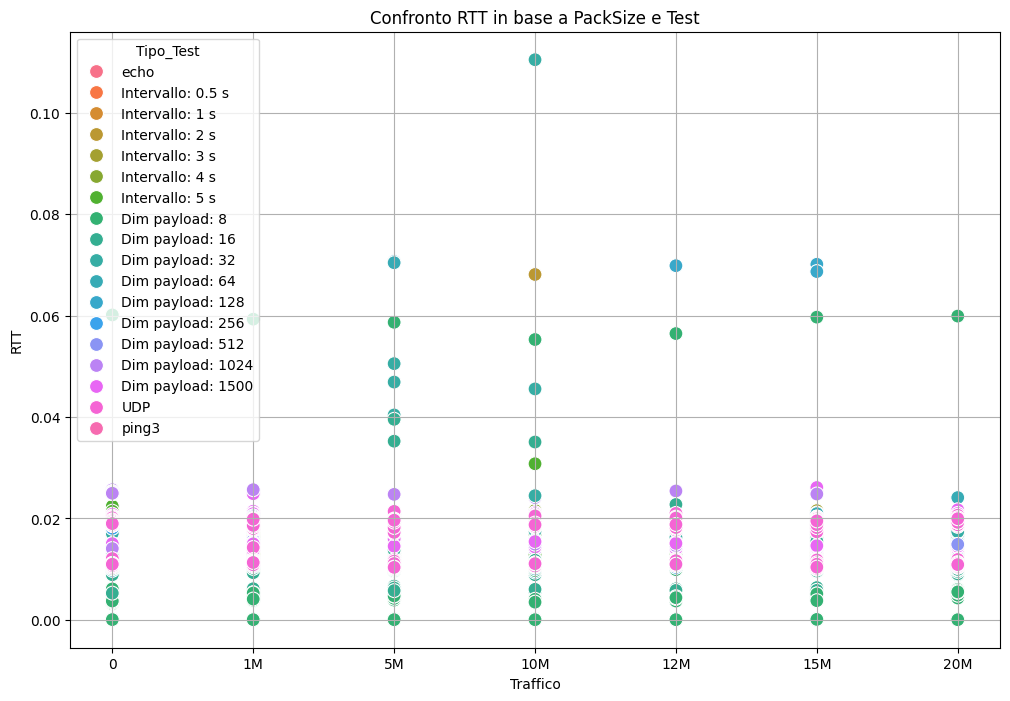

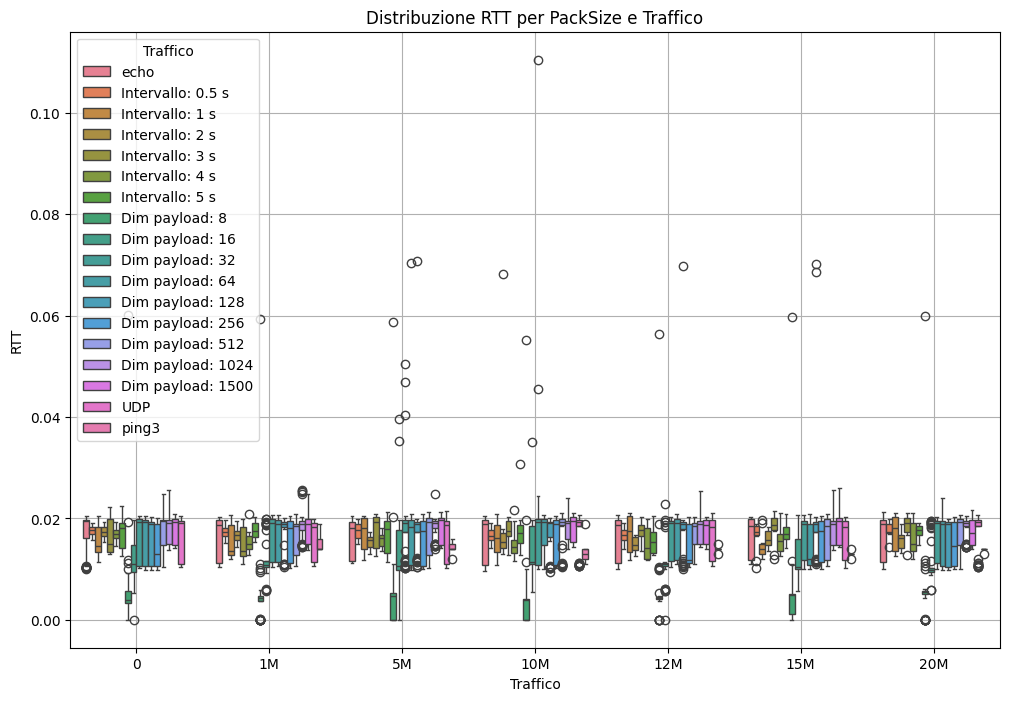

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-08-09.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Calcolare statistiche descrittive
stats = df.groupby(['Traffico'])['RTT'].agg(['mean', 'std', 'count'])
print(stats)

# Creare grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test', s=100)
plt.xlabel('Traffico')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Tipo_Test')
plt.grid(True)
plt.show()

# Creare box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test')
plt.xlabel('Traffico')
plt.ylabel('RTT')
plt.title('Distribuzione RTT per PackSize e Traffico')
plt.legend(title='Traffico')
plt.grid(True)
plt.show()


              mean       var       std       min       max  count
Traffico                                                         
0         0.015625  0.000030  0.005484  0.000036  0.060136    660
10M       0.016100  0.000049  0.006986  0.000029  0.110467    665
12M       0.015544  0.000030  0.005480  0.000031  0.069845    665
15M       0.015638  0.000036  0.005987  0.000029  0.070125    665
1M        0.015585  0.000028  0.005247  0.000026  0.059300    665
20M       0.015429  0.000028  0.005252  0.000029  0.059907    665
5M        0.015862  0.000043  0.006567  0.000030  0.070677    665


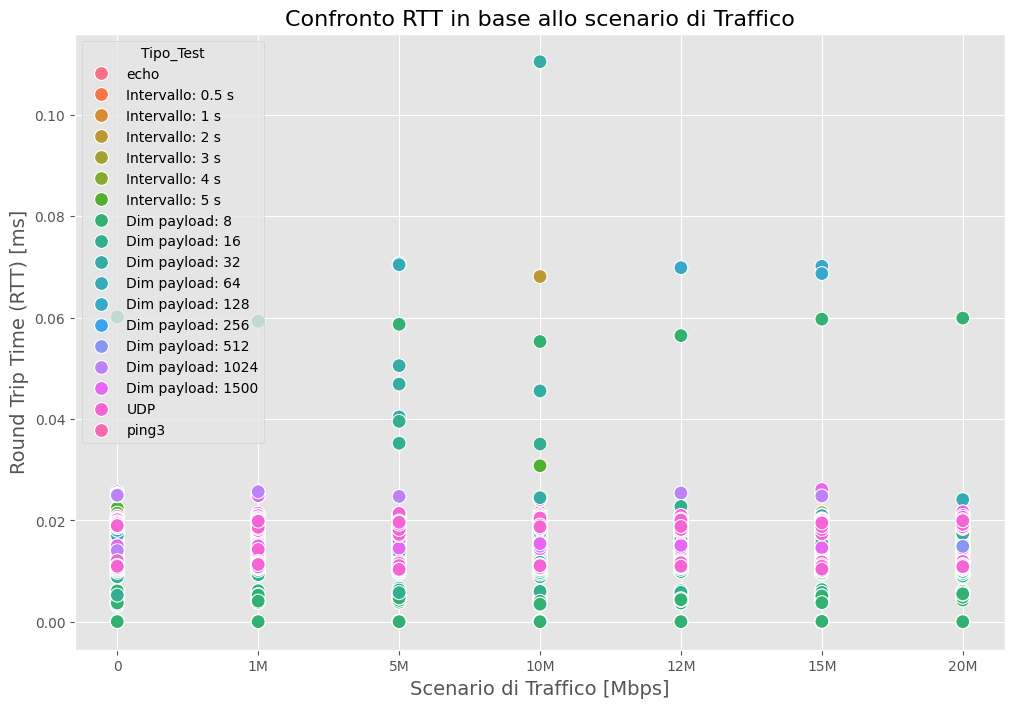

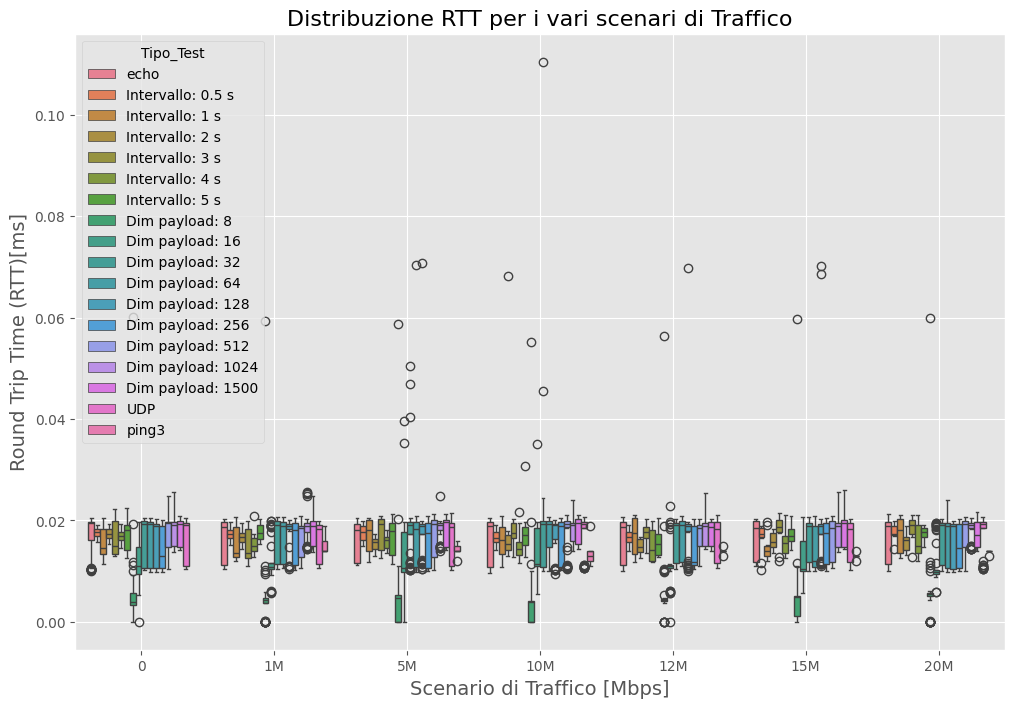

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-08-09.csv')

# Calcolare la media e la varianza del RTT per tipologia di test
stats = df.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count'])
# Visualizzare le statistiche calcolate
print(stats)

# Funzione per formattare i tick sull'asse y

# Funzione per formattare i tick sull'asse x
pack_sizes = sorted(df['Traffico'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test', s=100)

# Personalizzare gli assi
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base allo scenario di Traffico', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test')
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per i vari scenari di Traffico', fontsize=16)


# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()


              mean       var       std       min       max  count
Traffico                                                         
0         0.015625  0.000030  0.005484  0.000036  0.060136    660
10M       0.016100  0.000049  0.006986  0.000029  0.110467    665
12M       0.015544  0.000030  0.005480  0.000031  0.069845    665
15M       0.015638  0.000036  0.005987  0.000029  0.070125    665
1M        0.015585  0.000028  0.005247  0.000026  0.059300    665
20M       0.015429  0.000028  0.005252  0.000029  0.059907    665
5M        0.015862  0.000043  0.006567  0.000030  0.070677    665


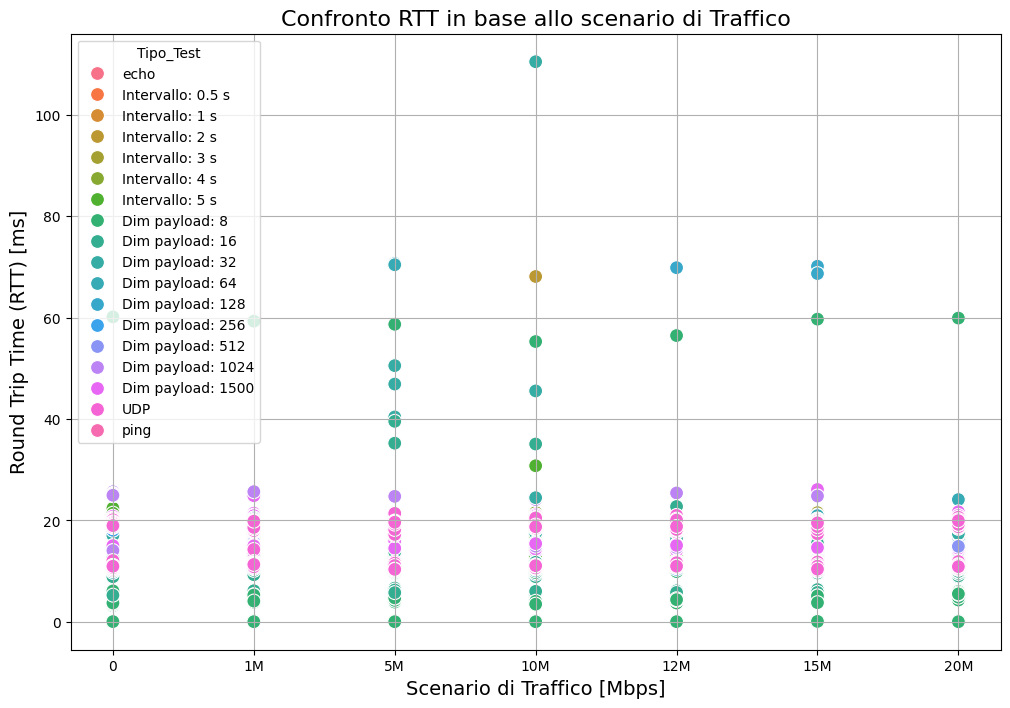

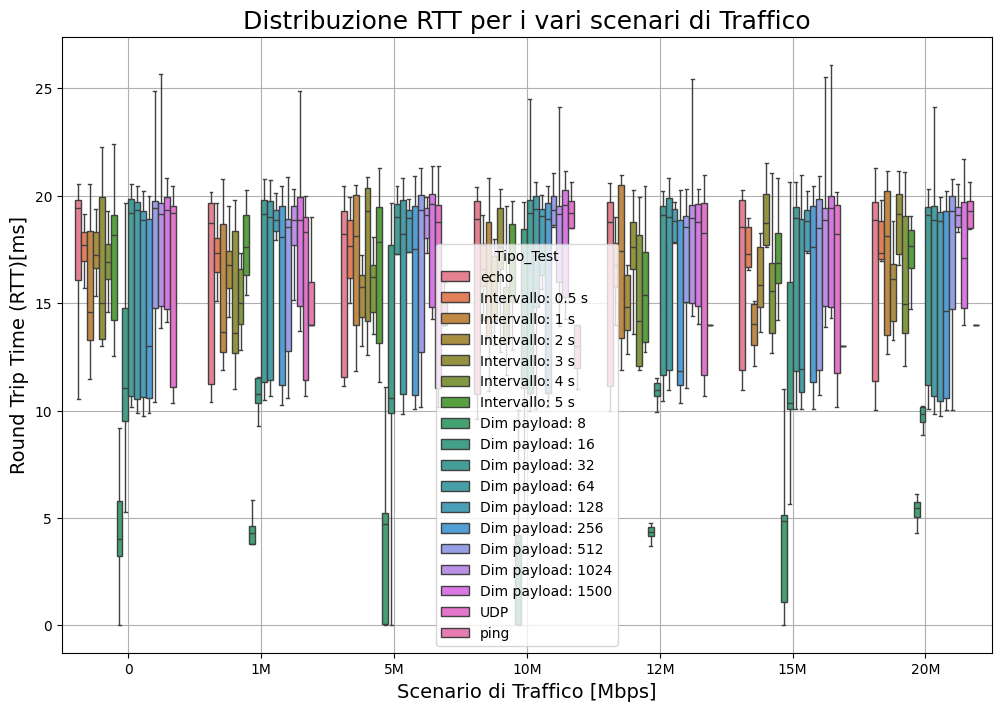

\begin{tabular}{lrrrrrr}
\toprule
 & mean & var & std & min & max & count \\
Tipo_Test &  &  &  &  &  &  \\
\midrule
Dim payload: 1024 & 0.018293 & 0.000006 & 0.002509 & 0.013847 & 0.025673 & 350 \\
Dim payload: 128 & 0.017469 & 0.000045 & 0.006730 & 0.009420 & 0.070677 & 350 \\
Dim payload: 1500 & 0.017730 & 0.000007 & 0.002636 & 0.013718 & 0.026101 & 350 \\
Dim payload: 16 & 0.012306 & 0.000022 & 0.004718 & 0.000030 & 0.039548 & 350 \\
Dim payload: 256 & 0.015386 & 0.000017 & 0.004152 & 0.009899 & 0.020936 & 350 \\
Dim payload: 32 & 0.017187 & 0.000051 & 0.007110 & 0.009958 & 0.110467 & 350 \\
Dim payload: 512 & 0.017172 & 0.000013 & 0.003553 & 0.010027 & 0.024888 & 350 \\
Dim payload: 64 & 0.016417 & 0.000026 & 0.005144 & 0.009830 & 0.070431 & 350 \\
Dim payload: 8 & 0.005287 & 0.000069 & 0.008300 & 0.000026 & 0.060136 & 350 \\
Intervallo: 0.5 s & 0.017136 & 0.000003 & 0.001756 & 0.010216 & 0.019952 & 70 \\
Intervallo: 1 s & 0.016077 & 0.000011 & 0.003355 & 0.010904 & 0.021137 & 70 

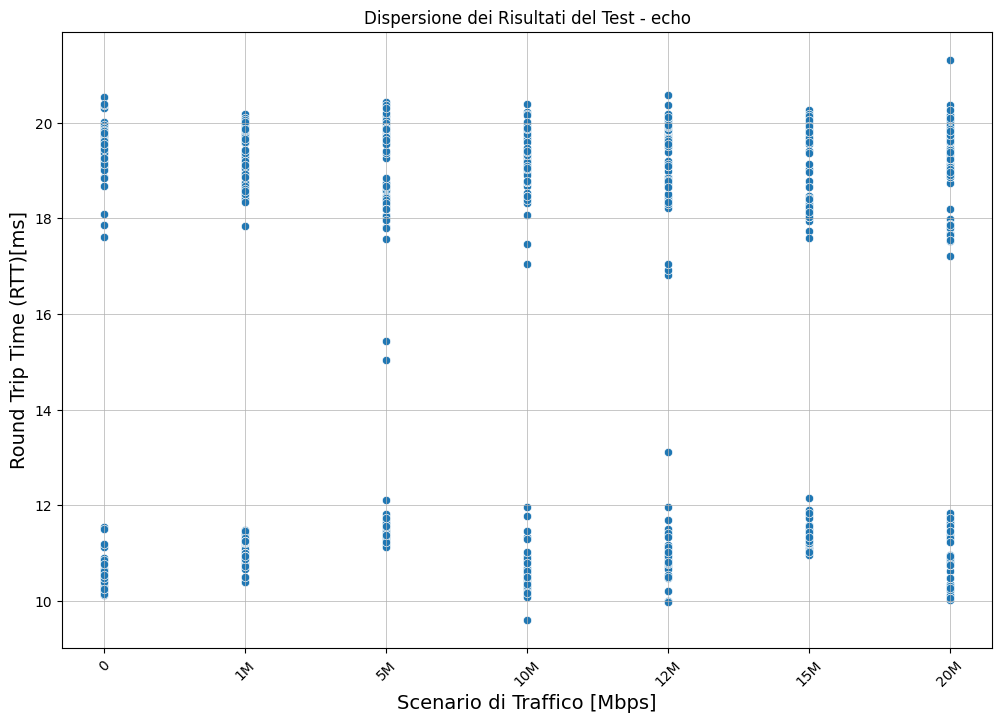

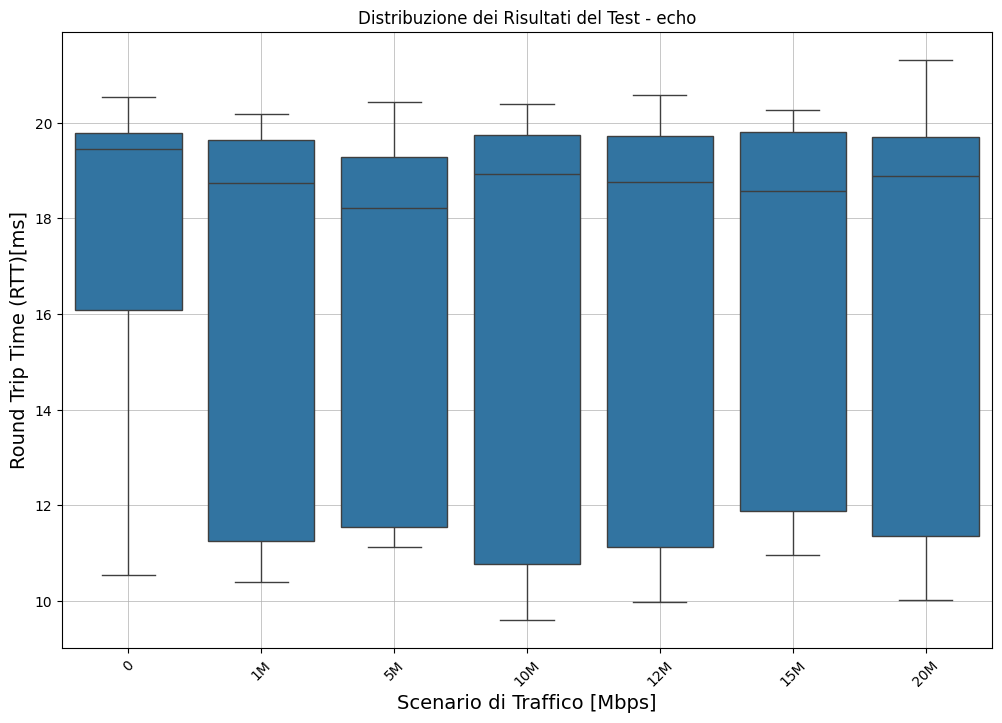

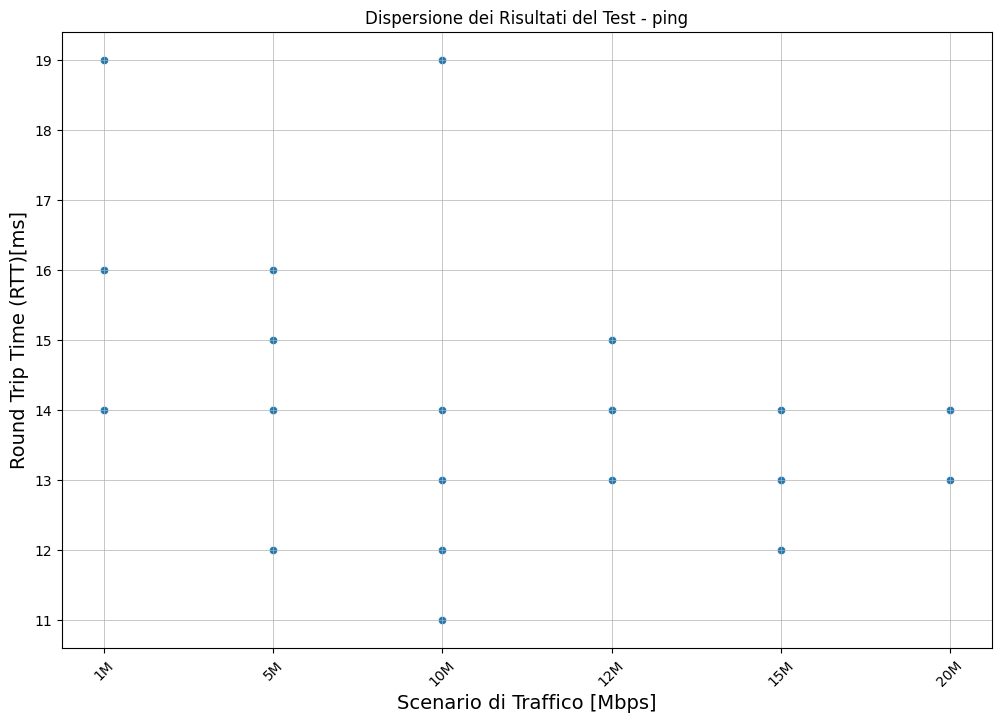

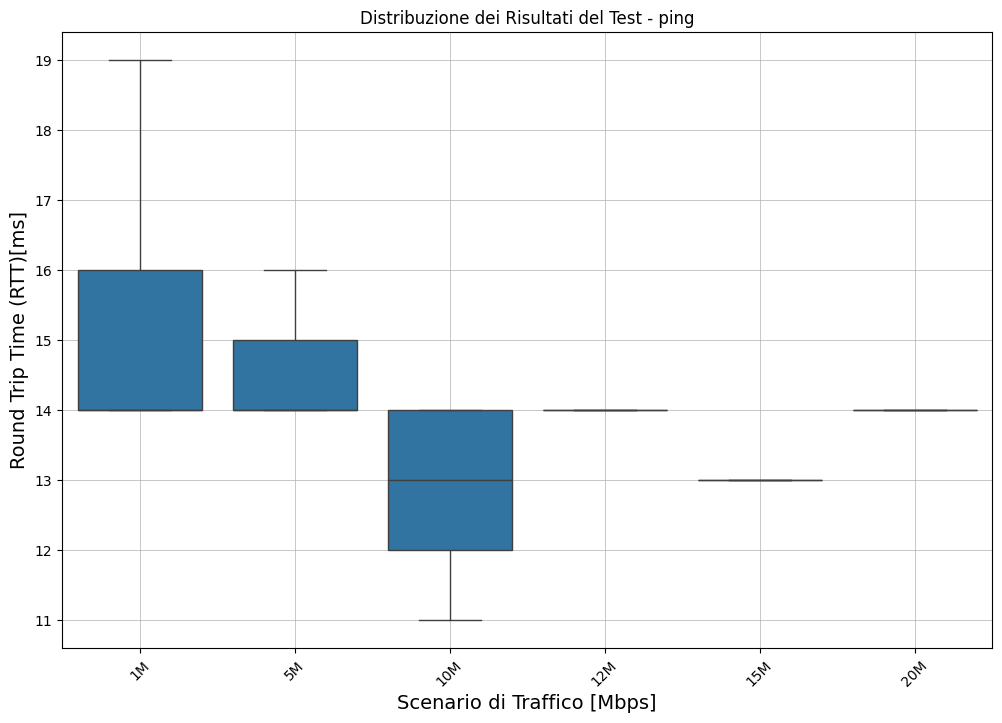

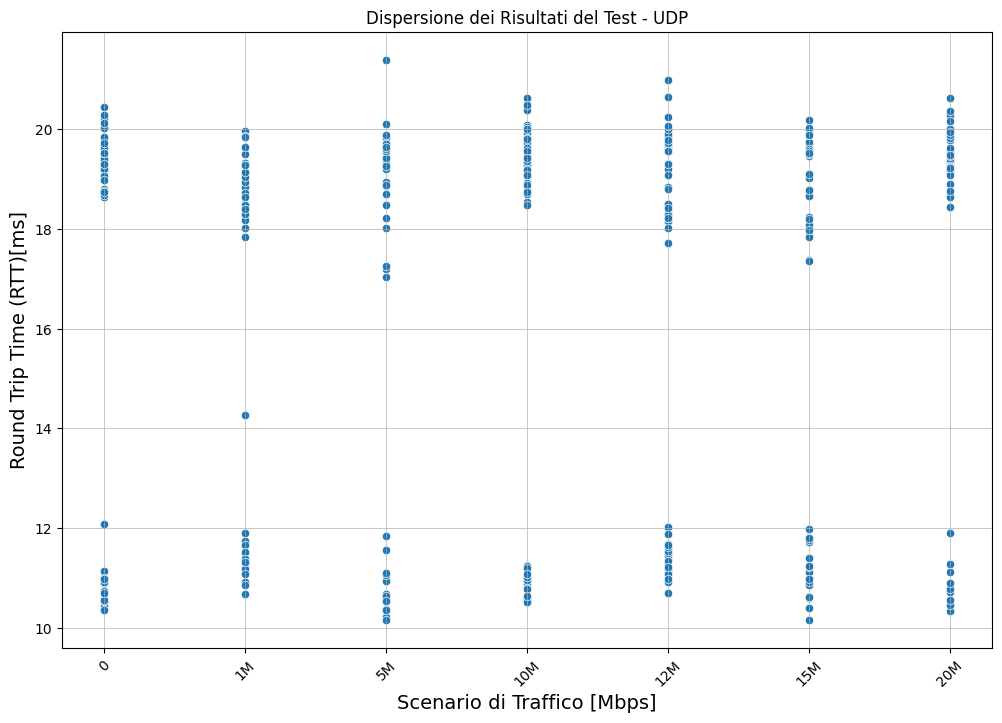

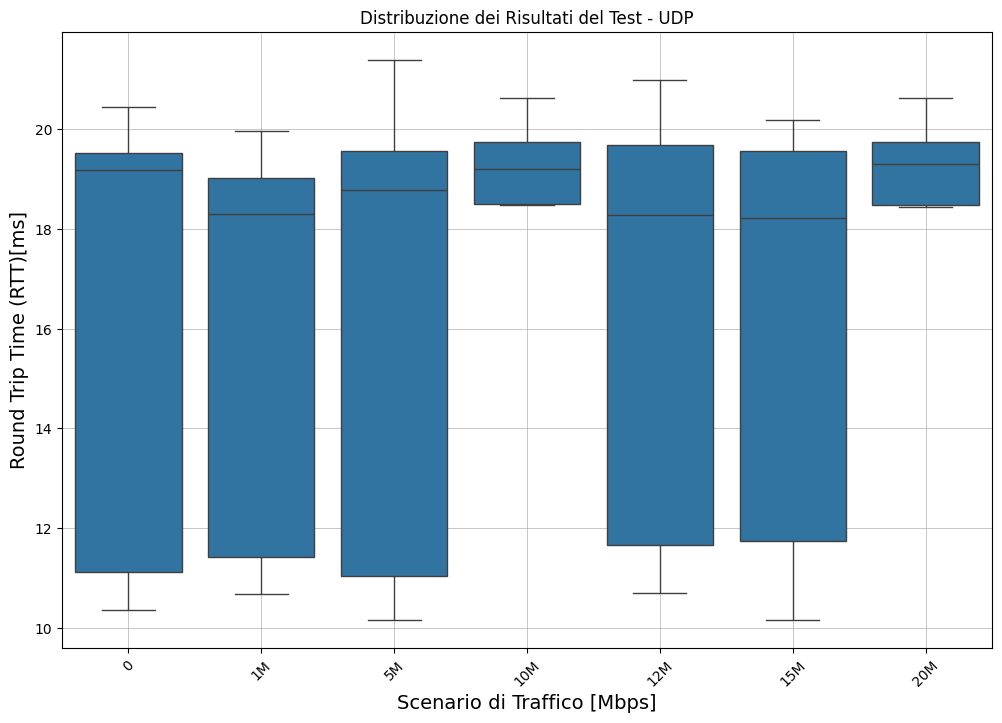

              Tipo_Test Traffico       RTT
100   Intervallo: 0.5 s        0  0.019157
101   Intervallo: 0.5 s        0  0.018583
102   Intervallo: 0.5 s        0  0.018499
103   Intervallo: 0.5 s        0  0.017678
104   Intervallo: 0.5 s        0  0.017737
...                 ...      ...       ...
4145    Intervallo: 5 s      20M  0.017384
4146    Intervallo: 5 s      20M  0.016992
4147    Intervallo: 5 s      20M  0.016545
4148    Intervallo: 5 s      20M  0.014934
4149    Intervallo: 5 s      20M  0.014745

[420 rows x 3 columns]


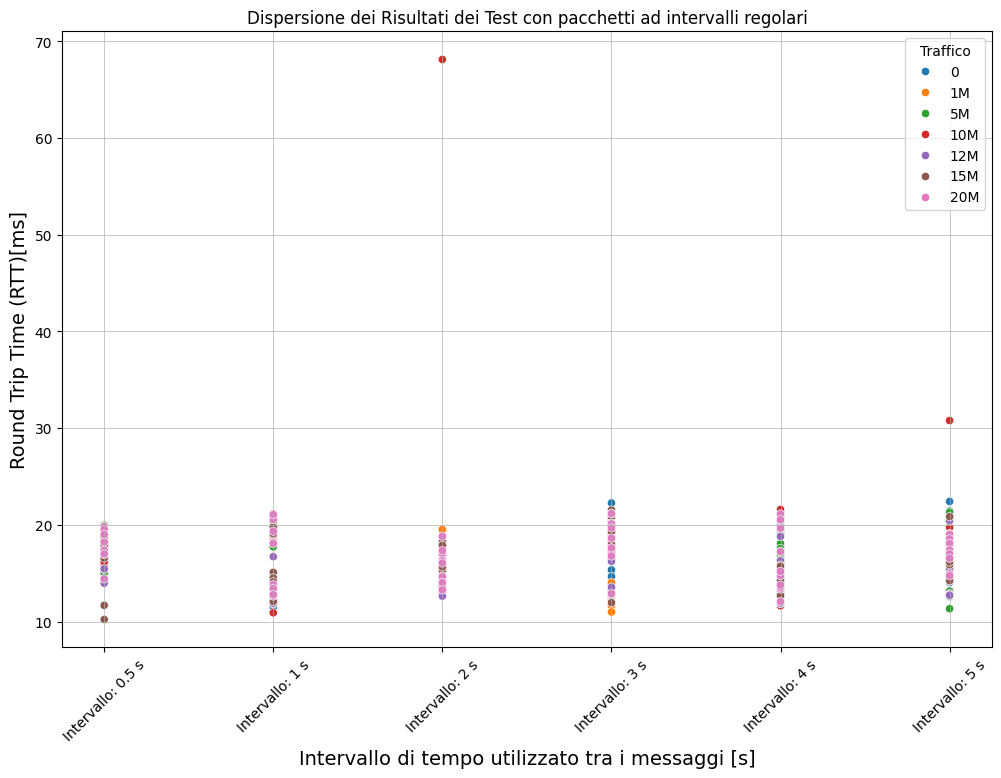

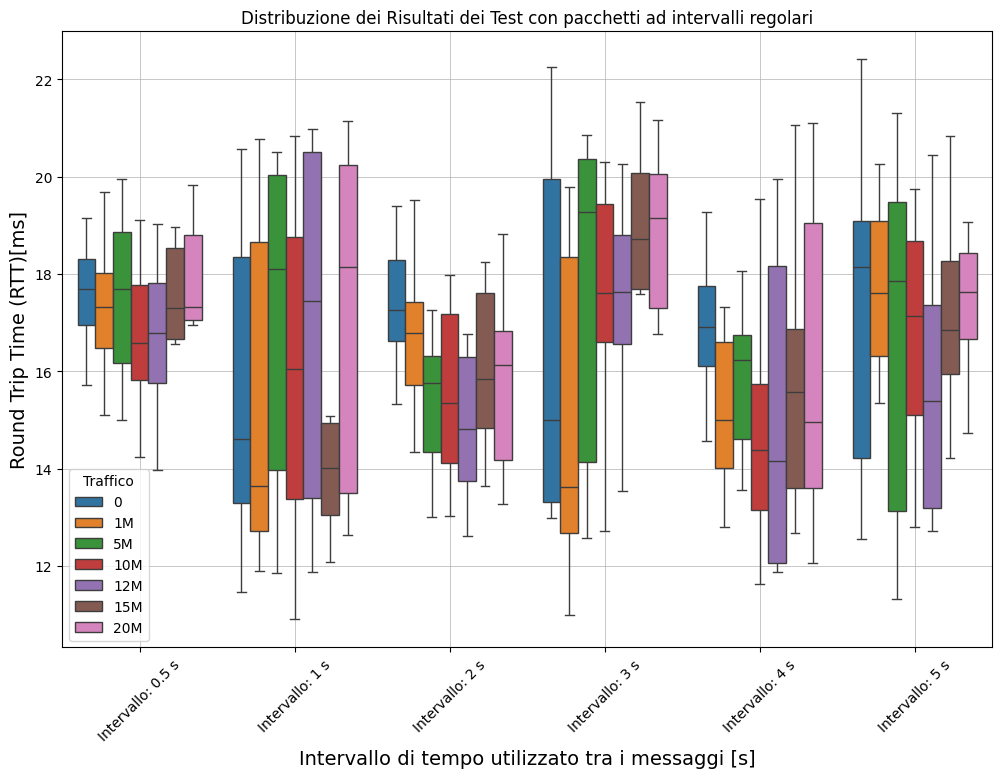

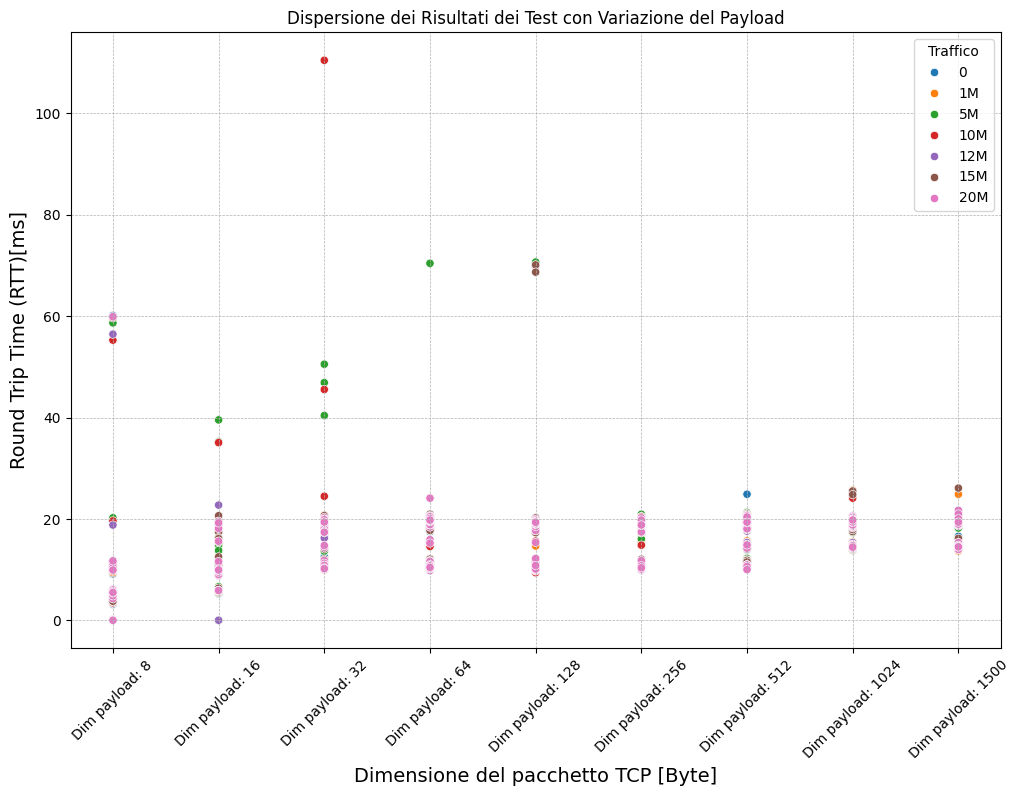

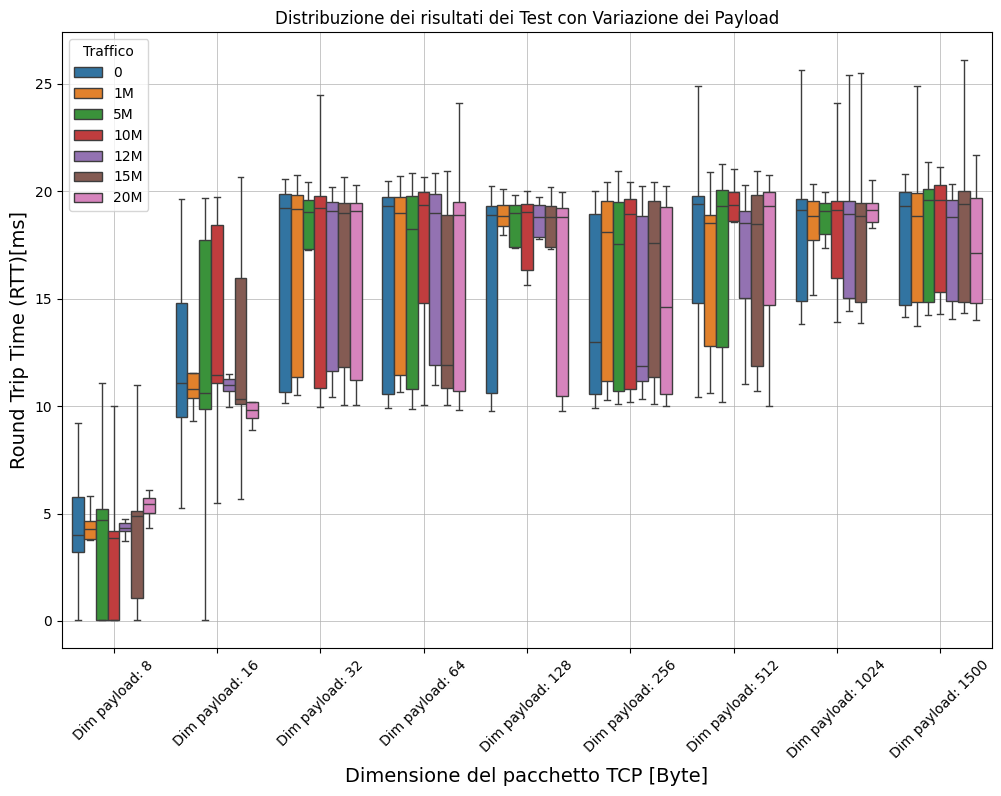

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def y_fmt(x, pos):
    return f'{x*1000:.0f}'
# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-08-09.csv')

# Calcolare la media e la varianza del RTT per tipologia di test
stats = df.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count'])
# Visualizzare le statistiche calcolate
print(stats)

# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test', s=100)
# Personalizzare gli assi
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base allo scenario di Traffico', fontsize=16)
# Abilitare la griglia
plt.grid(True)
# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Traffico', y='RTT', hue='Tipo_Test',showfliers=False)
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per i vari scenari di Traffico', fontsize=18)
# Abilitare la griglia
plt.grid(True)
# Mostrare il grafico
plt.show()

stats = df.groupby(['Tipo_Test'])['RTT'].agg(['mean', 'var','std','min','max','count'])
print(stats.to_latex())
tipo_test=['echo','ping','UDP']
for tipo in tipo_test:
    dati_filtrati = df[df['Tipo_Test'] == tipo]
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Traffico', y='RTT', data=dati_filtrati)
    plt.title(f'Dispersione dei Risultati del Test - {tipo}')
    plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
    plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
    plt.grid(True, which='both', linewidth=0.5)
    plt.show()
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Traffico', y='RTT', data=dati_filtrati, showfliers=False)
    plt.title(f'Distribuzione dei Risultati del Test - {tipo}')
    plt.xlabel('Scenario di Traffico [Mbps]', fontsize=14)
    plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
    plt.grid(True, which='both', linewidth=0.5)
    plt.show()

tipo_int=['Intervallo: 0.5 s','Intervallo: 1 s','Intervallo: 2 s','Intervallo: 3 s','Intervallo: 4 s','Intervallo: 5 s']
tipo_dim=['Dim payload: 8','Dim payload: 16','Dim payload: 32','Dim payload: 64','Dim payload: 128','Dim payload: 256','Dim payload: 512','Dim payload: 1024','Dim payload: 1500']
dfapp=df
for tipo in tipo_test:
        intervalli = dfapp[dfapp['Tipo_Test'] != tipo]
        dfapp=intervalli
for tipo_dim_app in tipo_dim:
        intervalli = dfapp[dfapp['Tipo_Test'] != tipo_dim_app]
        dfapp=intervalli
print(intervalli)

    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tipo_Test', y='RTT', hue='Traffico', data=intervalli)
plt.title('Dispersione dei Risultati dei Test con pacchetti ad intervalli regolari')
plt.xlabel('Intervallo di tempo utilizzato tra i messaggi [s]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.grid(True, which='both', linewidth=0.5)
plt.show()
plt.figure(figsize=(12,8))
sns.boxplot(x='Tipo_Test', y='RTT',hue='Traffico', data=intervalli, showfliers=False)
plt.title(f'Distribuzione dei Risultati dei Test con pacchetti ad intervalli regolari')
plt.xlabel('Intervallo di tempo utilizzato tra i messaggi [s]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.grid(True, which='both', linewidth=0.5)
plt.show()


dfapp=df
for tipo in tipo_test:
        dati_filtrati = dfapp[dfapp['Tipo_Test'] != tipo]
        dfapp=dati_filtrati
for tipo_int_app in tipo_int:
        dati_filtrati = dfapp[dfapp['Tipo_Test'] != tipo_int_app]
        dfapp=dati_filtrati
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tipo_Test', y='RTT', hue='Traffico',data=dati_filtrati)
plt.title('Dispersione dei Risultati dei Test con Variazione del Payload')
plt.xlabel('Dimensione del pacchetto TCP [Byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
plt.figure(figsize=(12,8))
sns.boxplot(x='Tipo_Test', y='RTT', hue='Traffico',data=dati_filtrati, showfliers=False)
plt.title('Distribuzione dei risultati dei Test con Variazione dei Payload')
plt.xlabel('Dimensione del pacchetto TCP [Byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.grid(True, which='both', linewidth=0.5)
plt.show()
